<a href="https://colab.research.google.com/github/MarcosRMG/Bootcamp-Alura-Data-Science/blob/main/M%C3%B3dulo_6_Machine_Learning_Modelos%2C_M%C3%A9tricas_e_Valida%C3%A7%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Workflow de Machine Learning

## 1.1 Bibliotecas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [29]:
matplotlib.rcParams['font.size'] = 2
sns.set_theme(style='darkgrid')

## 1.2 Dados

### 1.2.1 Sirio Libanês

In [30]:
dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

### 1.2.2 Titanic

In [31]:
fonte_titanic_treino = 'https://raw.githubusercontent.com/MarcosRMG/Bootcamp-Alura-Data-Science/main/data/train.csv'
dados_train_titanic = pd.read_csv(fonte_titanic_treino)
dados_train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.3 Funções

### 1.3.1 Roda modelo

In [32]:
def roda_modelo(dados: pd.DataFrame, y='ICU', 
                x_drop=['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'],
                modelo=DecisionTreeClassifier()):
  y = dados[y]
  x = dados.drop(x_drop, axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    random_state=seed)
  modelo = modelo
  modelo.fit(x_train, y_train)

  y_prediction = modelo.predict(x_test)
  print(f'AUC                {roc_auc_score(y_test, prob_arvore[:, 1]):.2f}')
  print('Classification report')
  print(classification_report(y_test, y_prediction))

### 1.3.2 Roda n modelos

In [33]:
def roda_n_modelos(dados: pd.DataFrame, n=30, y='ICU', 
                x_drop=['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'],
                modelo=DecisionTreeClassifier(), 
                descricao_modelo='Decision Tree Classifier'):
  auc_lista = list()
  y = dados[y]
  x = dados.drop(x_drop, axis=1)
  modelo = modelo

  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    prob_modelo = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_modelo[:, 1])
    auc_lista.append(auc)

  media_auc = np.mean(auc_lista)
  std_auc = np.std(auc_lista)

  print(descricao_modelo)
  print(f'Repetições: {n}')
  print(f'AUC Média: {media_auc:.2f}')
  print(f'Intervalo ({media_auc - 2 * std_auc} - {media_auc + 2 * std_auc})')

### 1.3.3 Plota curva AUC

In [34]:
def curva_auc(dados: pd.DataFrame, y='ICU', 
                x_drop=['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'],
                modelo=DecisionTreeClassifier(), 
              descricao_modelo='Decision Tree Classifier'):
  y = dados[y]
  x = dados.drop(x_drop, axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    random_state=seed)
  modelo = modelo
  modelo.fit(x_train, y_train)
  y_prediction = modelo.predict(x_test)
  return plot_roc_curve(modelo, x_test, y_test, name=descricao_modelo)

### 1.3.4 Roda modelo cv

In [35]:
def roda_modelo_cv(dados: pd.DataFrame, y='ICU', 
                x_drop=['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'],
                modelo=DecisionTreeClassifier(), n_splits=5, n_repeats=10,
                descricao_modelo='Decision Tree Classifier'):
  
  np.random.seed(2933)
  dados = dados.sample(frac=1).reset_index(drop=True)
  y = dados[y]
  x = dados.drop(x_drop, axis=1)

  modelo = modelo
  
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultado = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc')

  media = np.mean(resultado['test_score'])
  desvio_padrao = np.std(resultado['test_score'])

  print(f'''
Modelo: {descricao_modelo}
Divisões: {n_splits}
Repetições: {n_repeats}

AUC médio: {media:.2f}
Intervalo: ({(media - 2 * desvio_padrao):.2f} - {(media + 2 * desvio_padrao):.2f})
''')

### 1.3.5 Roda modelo cv 2

In [36]:
def roda_modelo_cv_2(dados: pd.DataFrame, y='ICU', 
                x_drop=['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'],
                modelo=DecisionTreeClassifier(), n_splits=5, n_repeats=10,
                descricao_modelo='Decision Tree Classifier'):
  
  np.random.seed(2933)
  dados = dados.sample(frac=1).reset_index(drop=True)
  y = dados[y]
  x = dados.drop(x_drop, axis=1)

  modelo = modelo
  
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultado = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', 
                             return_train_score=True)

  media_teste = np.mean(resultado['test_score'])
  media_treino = np.mean(resultado['train_score'])

  print(f'AUC teste/ treino: {media_teste:.2f} - {media_treino:.2f}')
  return media_teste, media_treino

## 1.4 Tratamento dos dados

### 1.4.1 Sírio Libanês

In [37]:
def preenche_tabela(dados):
  '''
  A função irá preencher as colunas com valores NaN

  Keywords arguments:
  dados: DataFrame com as informações disponibilizadas pelo hospital Sírio 
  Libanês

  return: Colunas preenchidas com os dados das linhas antecedentes ou 
  subsequentes do valor NaN
  '''
  features_continuas_colunas = dados.iloc[:, 13:-2].columns
  features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
  features_categoricas = dados.iloc[:, :13]
  saida = dados.iloc[:, -2:]
  dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
  dados_finais.columns = dados.columns
  return dados_finais

In [38]:
dados_limpos = preenche_tabela(dados)

# Removendo as linhas na qual o paciente foi para a UTI na primeira janela
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")

# Excluíndo as linhas que contenham valores NaN
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.517913,0.517913,0.517913,0.517913,-1.0,-0.958386,-0.958386,-0.958386,-0.958386,-1.0,-0.926916,-0.926916,-0.926916,-0.926916,-1.0,-0.306430,-0.306430,-0.306430,-0.306430,-1.0,-0.305377,-0.305377,-0.305377,-0.305377,-1.0,-0.945935,-0.945935,-0.945935,...,-0.955277,-0.955277,-1.0,-0.073908,-0.339631,-0.267838,-0.458545,0.067973,0.747996,-0.078023,-0.344698,-0.270867,-0.452606,0.064864,0.751914,-0.001207,-0.187010,-0.243988,-0.469278,0.350887,0.841908,-0.248728,-0.432592,-0.313034,-0.381784,-0.017968,0.808029,-0.799862,-0.785938,-0.804580,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.235219,0.235219,0.235219,0.235219,0.0,0.182797,0.182797,0.182797,0.182797,0.0,0.178947,0.178947,0.178947,0.178947,0.0,0.107783,0.107783,0.107783,0.107783,0.0,0.120988,0.120988,0.120988,0.120988,0.0,0.088861,0.088861,0.088861,...,0.125227,0.125227,0.0,0.248552,0.261409,0.241648,0.207736,0.239760,0.119912,0.254493,0.264516,0.247132,0.218765,0.247949,0.119985,0.270201,0.261183,0.260190,0.252147,0.193029,0.236797,0.246389,0.258776,0.274449,0.356890,0.262440,0.132323,0.322680,0.356078,0.324716,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [39]:
def prepare_window(rows):
  '''
  Atribui o valor 1 para os pacientes que foram para a UTI nas janelas 
  subsequentes
  '''
  if(np.any(rows["ICU"])):
      rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
  return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)

# Transformando a coluna AGE_PERCENTIL no tipo categórico
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.9

### 1.4.2 Titanic

In [40]:
# Transformando as colunas categóricas em binárias
dummies = ['Sex', 'Embarked']
dummies_prefix = {'Sex': None, 'Embarked': 'Embarked'}

for i in dummies:
  dados_train_titanic = dados_train_titanic.join(pd.get_dummies(dados_train_titanic[i], 
                                          prefix=dummies_prefix[i]))
  dados_train_titanic.drop(i, axis=1, inplace=True)

In [41]:
dados_train_titanic.shape

(891, 15)

In [42]:
dados_train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
female           0
male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [43]:
dados_train_titanic.dropna(inplace=True)

## 1.5 Machine Learning

### 1.5.1 Dummi classifier

In [44]:
seed = np.random.seed(73246)


x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.48863636363636365

### 1.5.2 Logistic regression

In [45]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6818181818181818

## 1.6 Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categoricos, mas utilizando outro metodo

In [46]:
desafio_1 = dados.copy()

In [47]:
label_encoder = LabelEncoder()

In [48]:
desafio_1['AGE_PERCENTIL'].unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [49]:
# Solução com o LabelEncoder
inteiros = label_encoder.fit_transform(desafio_1['AGE_PERCENTIL'])
inteiros

array([5, 5, 5, ..., 4, 4, 4])

In [50]:
# Solução com o OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [51]:
inteiros = inteiros.reshape(len(inteiros),1)

In [52]:
one_hot_encoder.fit_transform(inteiros)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

O LabelEncoder deve ser utilizado quando existe uma ordem de gradeza nas categorias, o OneHotEncoder deve ser utilizado quando não existe uma diferença numérica entre as categorias e o algoritmo não deve fazer cálculos com a categoria trasformada em número.

# 2 Métricas de Avaliação

## 2.1 Desafio 02: Verificar o impacto da mudança nos resultados ao codificar as variável categórica.

### 2.1.1 Modelo com codificação ordinal

In [53]:
y = dados_limpos["ICU"]
x = dados_limpos.drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    random_state=seed)
modelo = LogisticRegression(max_iter=500)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
print(f'Acurácia com a codificação ordinal: {accuracy_score(y_test, y_prediction):.2f}')

Acurácia com a codificação ordinal: 0.66


### 2.1.2 Modelo com codificação binária

#### 2.1.2.1 Get Dummies

In [55]:
# Retornando o formato dos dados na coluna AGE_PERCENTIL
dados_limpos['AGE_PERCENTIL'] = label_encoder.inverse_transform(dados_limpos['AGE_PERCENTIL'])

In [56]:
# Criando as colunas binárias da coluna AGE_PERCENTIL
dados_limpos_2 = pd.get_dummies(dados_limpos['AGE_PERCENTIL']).merge(right=dados_limpos, 
                                                    how='right', 
                                                    right_index=True, left_index=True)
dados_limpos_2.drop('AGE_PERCENTIL', inplace=True, axis=1)
dados_limpos_2.head()

,,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,1,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,0,0,0,1,0,0,0,0,0,0,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,1,0,0,0,0,0,0,0,0,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,1,0,0,0,0,0,0,0,0,0,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,...,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196

In [57]:
y = dados_limpos_2['ICU']
x = dados_limpos_2.drop(['ICU','WINDOW', 'PATIENT_VISIT_IDENTIFIER'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    random_state=seed)
modelo = LogisticRegression(max_iter=500)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)

In [58]:
print(f'Acurácia com a codificação binária: {accuracy_score(y_test, y_prediction):.2f}')

Acurácia com a codificação binária: 0.69


O modelo Logistic Regression com o uso do get dummies na colunas AGE_PERCENTIL aumentou a acurácia de 66% parar 69%.

## 2.1 Matriz de Confusão

In [59]:
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
y_prediction = modelo_arvore.predict(x_test)

In [60]:
accuracy_score(y_test, y_prediction)

0.6363636363636364

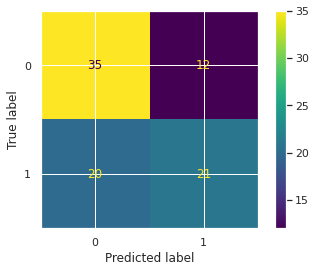

In [61]:
plot_confusion_matrix(modelo_arvore, x_test, y_test)

VERDADEIRO POSITIVO = 21

VERDADEIRO NEGATIVO = 35

FALSO POSITIVO = 12

FALSO NEGATIVO = 20

Verdadeiro positivo: Quando a previsão acerta o valor positivo;

Verdadeiro negativo: Quando a previsão acerta o valor negativo;

Falso positivo: Qando a previsão erra o valor positivo;

Falso negativo: Quando a previsão erra o valor negativo;

In [62]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        47
           1       0.64      0.51      0.57        41

    accuracy                           0.64        88
   macro avg       0.64      0.63      0.63        88
weighted avg       0.64      0.64      0.63        88



Precision: "O número correto dos resultados positivos dividido pelo resultado de todos os resultados positivos, incluindo aqueles que não foram identificados corretamente."

$precision = \frac{VP}{VP + FP}$

Recall = "O número correto identificado como positivo dividido pelo número de toda a amostra que deveria ter sido identificado como positivo."

$recall = \frac{VP}{VP + FN}$

### 2.1.1 Desafio 03: Pesquisar sobre F-score.

f1-score = "Média harmônica de precision e recall".

$f1-score = \frac{2 \times (precision \times recall)}{precision + recall}$

### 2.1.2 Desafio 04: Pesquisar e plotar a arvore de decisão criada pelo modelo.

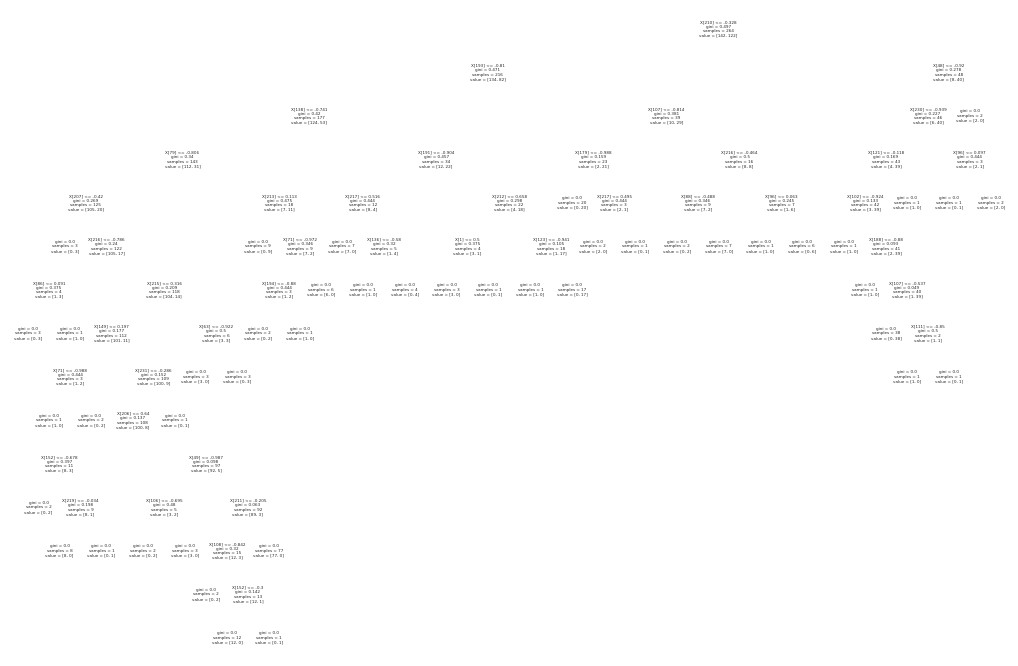

In [63]:
plt.figure(figsize=(18, 12))
plot_tree(modelo_arvore);

## 2.2 Curva ROC e AUC

In [64]:
prob_arvore = modelo_arvore.predict_proba(x_test)
roc_auc_score(y_test, prob_arvore[:, 1])

0.6284379865075247

In [65]:
roda_modelo(dados_limpos_2)

AUC                0.49
Classification report
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        47
           1       0.59      0.63      0.61        41

    accuracy                           0.62        88
   macro avg       0.62      0.63      0.62        88
weighted avg       0.63      0.62      0.63        88



### 2.2.1 Desafio 05: Criar uma função que gere a curva ROC.

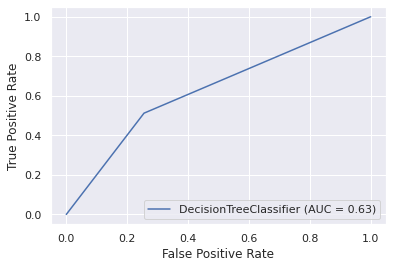

In [66]:
plot_roc_curve(modelo_arvore, x_test, y_test);

### 2.2.2 Desafio 06: Pensar e tentar diminuir o efeito de aleatoriedade nas previsões.

A forma mais usual é fixar um valor no atributo random_state.

# 3 Aleatoriedade de modelos

Solução da aula: não utilizar o random_state, executar o modelo n vezes e calcular o intervalo dos resultados.

In [67]:
roda_n_modelos(dados_limpos_2, 30)

Decision Tree Classifier
Repetições: 30
AUC Média: 0.61
Intervalo (0.5396777513589768 - 0.6781565333668493)


In [68]:
roda_n_modelos(dados_limpos_2, 30, modelo=LogisticRegression(max_iter=500), 
               descricao_modelo='Logistic Regression')

Logistic Regression
Repetições: 30
AUC Média: 0.77
Intervalo (0.6607799659431762 - 0.8702008332265178)


### 2.3.1 Desafio 07: Estudar a documentação do sklearn e testar outros modelos.

In [69]:
roda_n_modelos(dados_limpos_2, modelo=svm.SVC(probability=True), descricao_modelo='SVC')

SVC
Repetições: 30
AUC Média: 0.79
Intervalo (0.714112069171303 - 0.8725857339769414)


O modelo Support Vector Machine retornou uma média AUC um pouco melhor comparada aos demais modelos.

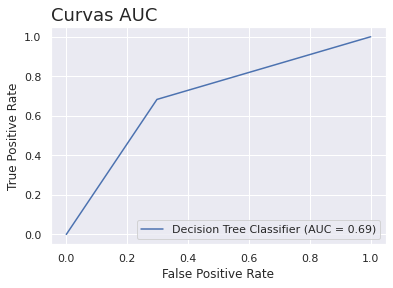

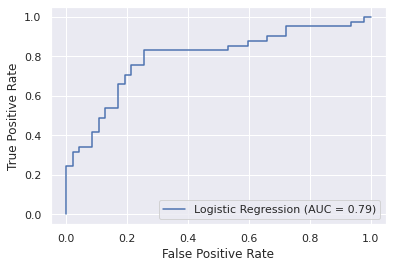

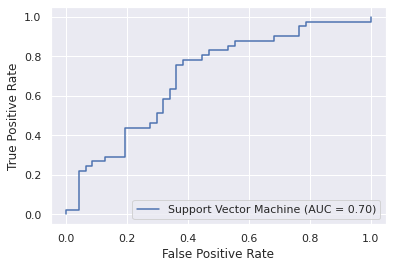

In [70]:
curva_auc(dados_limpos_2)
plt.title('Curvas AUC', loc='left', fontsize=18)
curva_auc(dados_limpos_2, modelo=LogisticRegression(max_iter=500), 
          descricao_modelo='Logistic Regression')
curva_auc(dados_limpos_2, modelo=svm.SVC(probability=True), 
          descricao_modelo='Support Vector Machine')
plt.legend();

# 4 Validação cruzada

In [71]:
'''
cv: O método StratifiedkFold irá embaralhar os dados e separar em pedaçoes 
menores para evitar que haja algum vies na ordenação e no uso dos dados de 
treino e teste
'''
cv = StratifiedKFold(shuffle=True) 
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.11206365, 0.11595106, 0.09566808, 0.09531736, 0.10132766]),
 'score_time': array([0.00219178, 0.00218415, 0.00235462, 0.00217605, 0.00227022]),
 'test_score': array([0.74647887, 0.70422535, 0.72857143, 0.7       , 0.72857143])}

In [72]:
cv = RepeatedStratifiedKFold()
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.09804749, 0.10110307, 0.0985806 , 0.09832788, 0.08138251,
        0.08912921, 0.1017642 , 0.10923815, 0.08603525, 0.08734655,
        0.10045481, 0.10988116, 0.07120037, 0.09050417, 0.09491515,
        0.09217525, 0.09339523, 0.08549738, 0.09003305, 0.09822536,
        0.09082937, 0.06784391, 0.09821868, 0.08103466, 0.09503603,
        0.10333776, 0.10214949, 0.07109451, 0.09514308, 0.09433413,
        0.11201477, 0.07477283, 0.10818219, 0.08550858, 0.0901444 ,
        0.08433056, 0.0886364 , 0.07889771, 0.08605576, 0.08954263,
        0.09642076, 0.06452775, 0.10505843, 0.08230448, 0.10659552,
        0.09307289, 0.08963203, 0.10156465, 0.08972383, 0.09500504]),
 'score_time': array([0.00220227, 0.00220728, 0.00221586, 0.00221801, 0.00220513,
        0.00240159, 0.00230122, 0.00218844, 0.00225472, 0.00221586,
        0.00220656, 0.00236297, 0.00222349, 0.00221539, 0.0025022 ,
        0.00218201, 0.00219131, 0.00222516, 0.00224423, 0.00224638,
        0.00219727, 

In [73]:
roda_modelo_cv(dados_limpos_2)


Modelo: Decision Tree Classifier
Divisões: 5
Repetições: 10

AUC médio: 0.62
Intervalo: (0.52 - 0.73)



In [74]:
roda_modelo_cv(dados_limpos_2, modelo=LogisticRegression(max_iter=500),
               descricao_modelo='Logistic Regression')


Modelo: Logistic Regression
Divisões: 5
Repetições: 10

AUC médio: 0.75
Intervalo: (0.66 - 0.85)



In [75]:
roda_modelo_cv(dados_limpos_2, modelo=svm.SVC(), 
               descricao_modelo='Suport Vector Machine')


Modelo: Suport Vector Machine
Divisões: 5
Repetições: 10

AUC médio: 0.78
Intervalo: (0.67 - 0.89)



O modelo Logistic Regression retornou uma melhor média por meio do uso do cross validation.

## 4.1 Desafio 08: Testar outros splitter classes e observar as diferenças. 

[GroupKFold](https://sklearn.org/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold)

K-fold iterator variant with non-overlapping groups.

The same group will not appear in two different folds (the number of distinct groups has to be at least equal to the number of folds).

The folds are approximately balanced in the sense that the number of distinct groups is approximately the same in each fold.

In [76]:
#cv = GroupKFold()
groups = np.array([0, 0, 2, 2, 4, 4])
group_kfold = GroupKFold()
cv = group_kfold.get_n_splits(x, y, groups)
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.09428   , 0.08207917, 0.06564999, 0.0778687 , 0.10746884]),
 'score_time': array([0.00225043, 0.00224781, 0.00220847, 0.00221658, 0.00226712]),
 'test_score': array([0.69014085, 0.76056338, 0.75714286, 0.7       , 0.67142857])}

Com o GroupKFold os dados são subdividodos de forma que os mesmos dados não aparecam nos demais grupos.

# 5 Desafios em Machine Learning

## 5.1 Desafio 09: Deixar o gráfico de AUC bonitão.

In [77]:
media_teste = list()
media_treino = list()
print('Decision Tree Classifier')
for i in range(1, 10):
  teste, treino = roda_modelo_cv_2(dados_limpos_2, 
                                   modelo=DecisionTreeClassifier(max_depth=i))
  media_teste.append(teste)
  media_treino.append(treino)

Decision Tree Classifier
AUC teste/ treino: 0.58 - 0.64
AUC teste/ treino: 0.64 - 0.74
AUC teste/ treino: 0.66 - 0.81
AUC teste/ treino: 0.64 - 0.88
AUC teste/ treino: 0.61 - 0.92
AUC teste/ treino: 0.59 - 0.96
AUC teste/ treino: 0.59 - 0.97
AUC teste/ treino: 0.58 - 0.98
AUC teste/ treino: 0.59 - 0.99


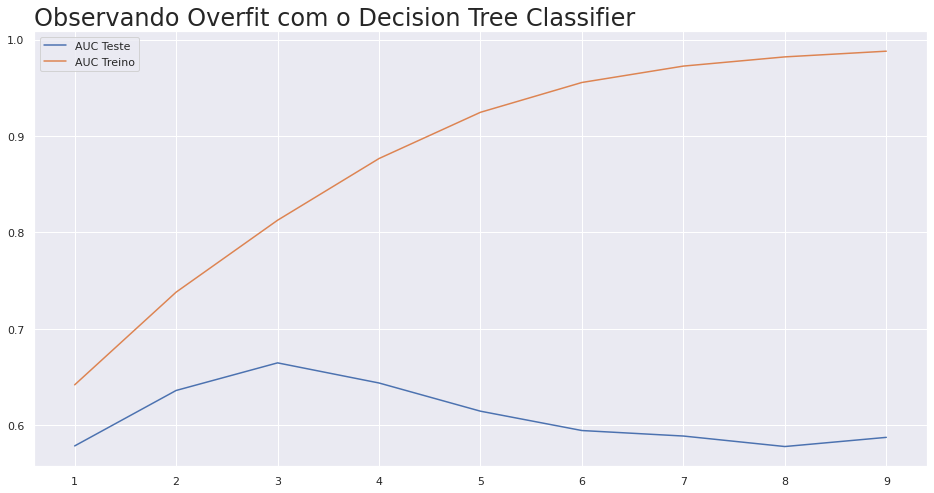

In [78]:
x = range(1, 10)
plt.figure(figsize=(16, 8))
plt.plot(x, media_teste, label='AUC Teste', )
plt.plot(x, media_treino, label='AUC Treino')
plt.title('Observando Overfit com o Decision Tree Classifier', loc='left', fontsize=24)
plt.legend();

O algoritmo Decision Tree Classifier é um modelo mais sensível ao overfit, por esse motivo o AUC de teste diminui após o terceiro nível, mas o AUC de treino continua aumentando.

In [79]:
media_teste = list()
media_treino = list()
print('Random Forest Classifier')
for i in range(1, 6):
  teste, treino = roda_modelo_cv_2(dados_limpos_2, 
                                   modelo=RandomForestClassifier(max_depth=i))
  media_teste.append(teste)
  media_treino.append(treino)

Random Forest Classifier
AUC teste/ treino: 0.77 - 0.85
AUC teste/ treino: 0.78 - 0.89
AUC teste/ treino: 0.78 - 0.94
AUC teste/ treino: 0.79 - 0.97
AUC teste/ treino: 0.79 - 0.99


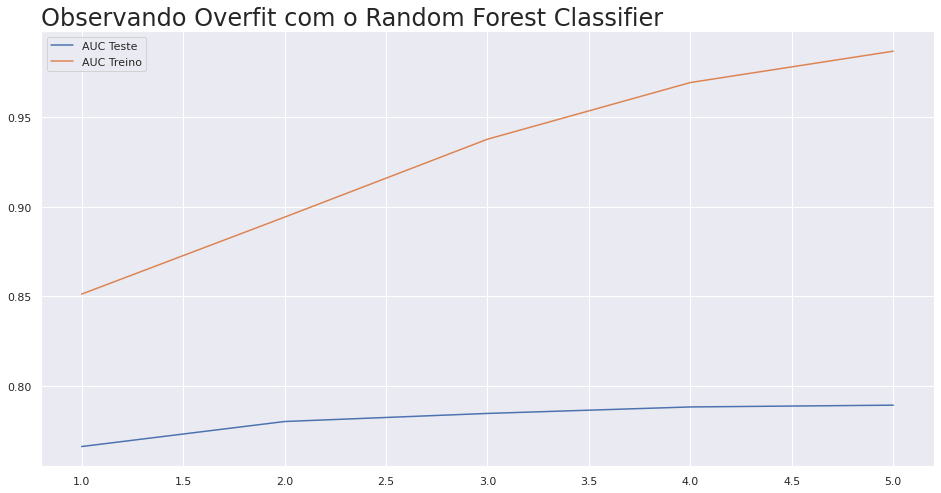

In [80]:
x = range(1, 6)
plt.figure(figsize=(16, 8))
plt.plot(x, media_teste, label='AUC Teste', )
plt.plot(x, media_treino, label='AUC Treino')
plt.title('Observando Overfit com o Random Forest Classifier', loc='left', fontsize=24)
plt.legend();

O modelo Random Forest Classifier é menos sensível ao overfit por combinar algoritmos gerando um maior número de amostras (arvores) de decisão.

## 5.2 Desafio 10: Criar um sobreajuste com outra base de dados, outro modelo de ML e plotar o gráfico para análise. (Dica: Base do titanic).

In [81]:
media_teste = list()
media_treino = list()
print('Decision Tree Classifier')
for i in range(1, 10):
  teste, treino = roda_modelo_cv_2(dados_train_titanic, 
                                   modelo=DecisionTreeClassifier(max_depth=i),
                                   y='Survived', x_drop=['Survived', 'Name',
                                                         'Ticket', 'Cabin'])
  media_teste.append(teste)
  media_treino.append(treino)

Decision Tree Classifier
AUC teste/ treino: 0.79 - 0.79
AUC teste/ treino: 0.80 - 0.85
AUC teste/ treino: 0.83 - 0.90
AUC teste/ treino: 0.80 - 0.93
AUC teste/ treino: 0.78 - 0.96
AUC teste/ treino: 0.75 - 0.98
AUC teste/ treino: 0.73 - 0.99
AUC teste/ treino: 0.71 - 0.99
AUC teste/ treino: 0.68 - 1.00


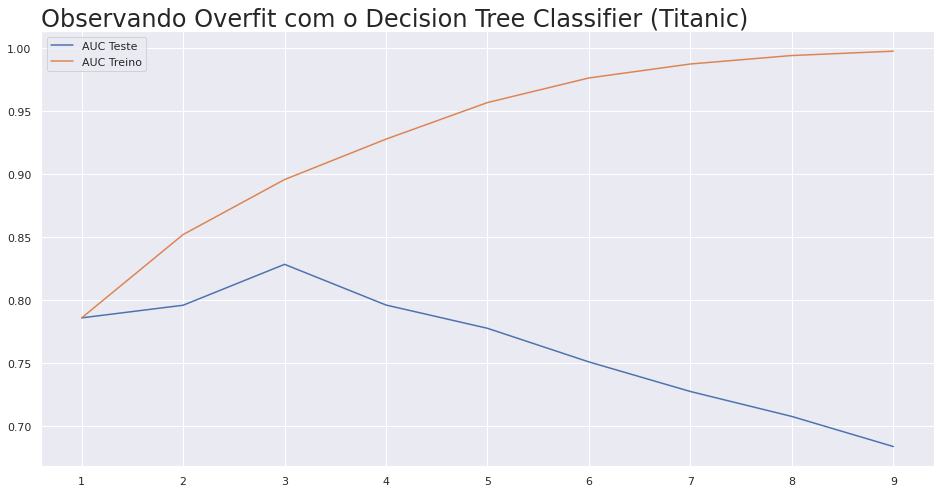

In [82]:
x = range(1, 10)
plt.figure(figsize=(16, 8))
plt.plot(x, media_teste, label='AUC Teste', )
plt.plot(x, media_treino, label='AUC Treino')
plt.title('Observando Overfit com o Decision Tree Classifier (Titanic)', loc='left', fontsize=24)
plt.legend();

In [83]:
media_teste = list()
media_treino = list()
print('Random Forest Classifier')
for i in range(1, 6):
  teste, treino = roda_modelo_cv_2(dados_train_titanic, 
                                   modelo=RandomForestClassifier(max_depth=i),
                                   y='Survived', x_drop=['Survived', 'Name',
                                                         'Ticket', 'Cabin'])
  media_teste.append(teste)
  media_treino.append(treino)

Random Forest Classifier
AUC teste/ treino: 0.83 - 0.88
AUC teste/ treino: 0.84 - 0.91
AUC teste/ treino: 0.84 - 0.94
AUC teste/ treino: 0.84 - 0.96
AUC teste/ treino: 0.83 - 0.99


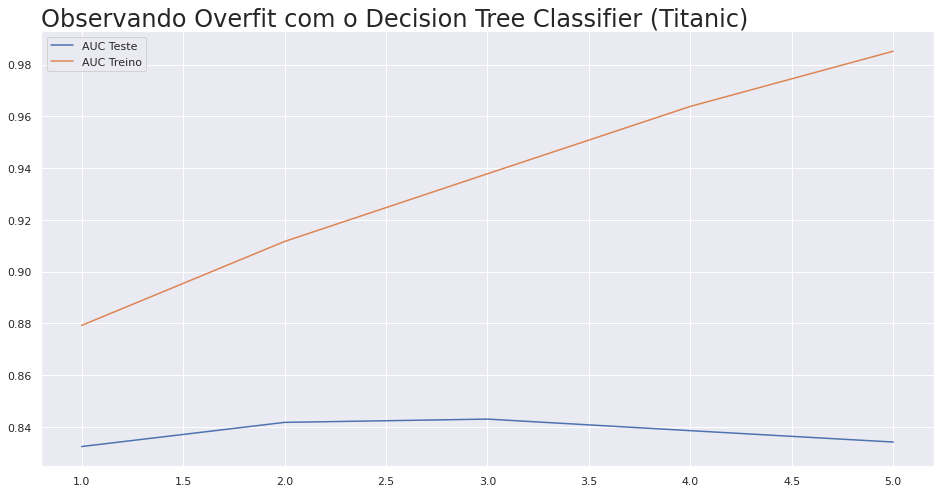

In [84]:
x = range(1, 6)
plt.figure(figsize=(16, 8))
plt.plot(x, media_teste, label='AUC Teste', )
plt.plot(x, media_treino, label='AUC Treino')
plt.title('Observando Overfit com o Decision Tree Classifier (Titanic)', 
          loc='left', fontsize=24)
plt.legend();

## 5.3 Desafio 11: Estudar um pouco mais sobre overfit e underfit.

[Machine Learning: O que é overfit?](https://cursos.alura.com.br/machine-learning-o-que-e-overfit--c315)

Síntese: O overfit é um superajuste aos dados de treino, impossibilitando a previsão de dados futuros pois o superajuste não possibilita a generalização.

Underfit é a situação oposto, quando o modelo não consegue o ajuste necessário aos dados e consequentemente também não pode generalizar para realizar previsões. 

## 5.4 Desafio 12: Escolha um modelo de ML, estude os hiperparâmetros desse modelo e teste vários hiperparâmetros.

Random Forest Classifier

In [85]:
modelo_random_forest = RandomForestClassifier(n_estimators=10, random_state=2938)

modelo_random_forest.fit(x, y)

ValueError: ignored

In [ ]:
plt.figure(figsize=(16, 8))
tree.plot_tree(modelo_random_forest.estimators_[9], filled=True);

## 5.5 Desafio 13: Pesquisar como salvar um modelo treinado.

Uma opção é o módulo [Pickle](https://sigmoidal.ai/como-salvar-seu-modelo-de-machine-learning/)

# 6 Finalizando a validação

In [ ]:
dados_limpos.head()

In [ ]:
dados.iloc[:, 4:-2]

In [ ]:
def remove_corr_var(dados: pd.DataFrame, valor_corte):
  matriz_corr = dados.iloc[:, 4:-2].corr().abs()
  matriz_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1,).astype(np.bool))
  excluir = [coluna for coluna in matriz_superior.columns if any(matriz_superior[coluna] > valor_corte)]

  return dados.drop(excluir, axis=1)

In [ ]:
dados_limpos_corr = remove_corr_var(dados_limpos, 0.95)

In [ ]:
dados_limpos_corr.head()

In [ ]:
dados_limpos_corr.shape

In [ ]:
dados_limpos_corr.shape[1] / dados_limpos.shape[1]

In [ ]:
roda_modelo_cv(dados_limpos, modelo=RandomForestClassifier(), 
               descricao_modelo='Random Forest Classifier')

In [ ]:
roda_modelo_cv(dados_limpos_corr, modelo=RandomForestClassifier(), 
               descricao_modelo='Random Forest Classifier')

## 6.1 Desafio 14: Ler no Sklearn sobre feature selection, feature importance.

[Feature importance with forests of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

[Feature selection](https://sklearn.org/modules/feature_selection.html)

## 6.2 Desafio 15: Plotar também a matriz de confusão.

In [ ]:
#plot_confusion_matrix(modelo_arvore, x_test, y_test)

## 6.3 Desafio 16: Repassar pelo desafio 12, com as bases de dados alteradas.

## 6.4 Desafio Extra: Criar um pipeline de treinamento.

# 7 Referências

Minerando Dados. One Hot Encoding? Entenda como Funciona com Exemplos em Python. disponível em: https://minerandodados.com.br/one-hot-encoding-como-funciona-python/. Acesso em: 12 Fev. 2021.

Wikipedia. F-score. Disponível em: https://en.m.wikipedia.org/wiki/F-score. Acesso em: 16 Fev. 2021.



---

